In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#from sklearn.

In [9]:
from nltk.corpus import stopwords
import string

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
df= pd.read_csv('data/df_and_token.csv')

In [9]:
df.head(1)

,Unnamed: 0,index,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,token_strings
0,0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortable ab...


In [12]:
vectorizer= TfidfVectorizer(min_df=3, max_features= 5000, 
                            token_pattern= '\s([A-Za-z0-9-]+)\s', ngram_range=(1,2))

In [13]:
tfidf= vectorizer.fit_transform(df.token_strings)

In [14]:
matrix = tfidf.todense()
word_matrix = pd.DataFrame(data = matrix, columns= vectorizer.get_feature_names())
word_matrix.head(1)

,-,--small,00p,2nd,2p,30dd,32b,32c,32d,32dd,...,year-old,year-round,yellow,yesterday,yet,yet-not,yoga,young,zip,zipper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
word_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22641 entries, 0 to 22640
Columns: 8228 entries, - to zipper-not
dtypes: float64(8228)
memory usage: 1.4 GB


In [49]:
def top_n_ngram(corpus,n = None,ngram = 1):
    bag_of_words = tfidf 
    sum_words = bag_of_words.sum(axis =0) #Calculates the tfidf of all the word in the whole review
    words_freq = [(word,sum_words[0,idx]) for word,idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]


<AxesSubplot:title={'center':'Top 20 unigrams in review after removing stop words'}, xlabel='token_strings'>

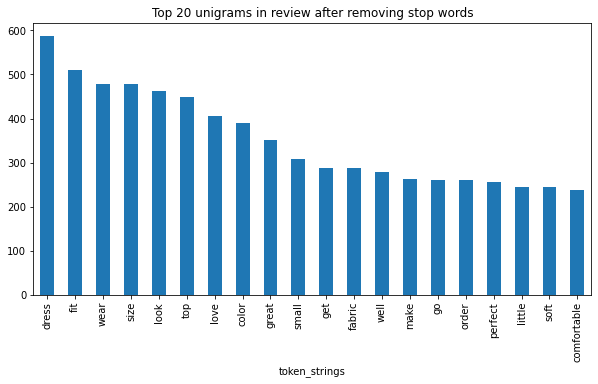

In [51]:
common_words = top_n_ngram(df['token_strings'], 20, 1)
common_df = pd.DataFrame(common_words, columns = ['token_strings' , 'count'])

plt.figure(figsize =(10,5))
common_df.groupby('token_strings').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 unigrams in review after removing stop words')


In [45]:
def top_n_ngram(corpus,n = None,ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus) #Have the count of  all the words for each review
    sum_words = bag_of_words.sum(axis =0) #Calculates the count of all the word in the whole review
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]


<AxesSubplot:title={'center':'Top 20 unigrams in review after removing stop words'}, xlabel='token_strings'>

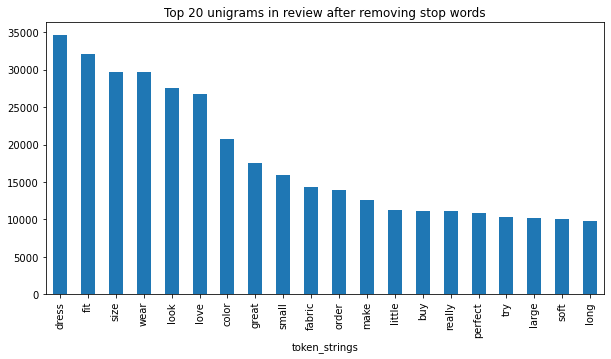

In [46]:
common_words = top_n_ngram(df['token_strings'], 20, 1)
common_df = pd.DataFrame(common_words, columns = ['token_strings' , 'count'])

plt.figure(figsize =(10,5))
common_df.groupby('token_strings').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 unigrams in review after removing stop words')

## Machine Learning

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [15]:
X= word_matrix
y= df['Recommended IND']

X.shape, y.shape

((22641, 5000), (22641,))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    stratify=y, 
                                                    test_size=0.2)

In [17]:
def model(mod, model_name, X_train, y_train, X_test, y_test):
    mod.fit(X_train, y_train)
    print(model_name)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 5)
    predictions = cross_val_predict(mod, X_train, y_train, cv = 5)
    print("Accuracy:", round(acc.mean(),3))
    cm = confusion_matrix(predictions, y_train)
    print("Confusion Matrix:  \n", cm)
    print("Classification Report \n", classification_report(predictions, y_train))

In [18]:
#1. Gaussian Naive Bayes
gnb = GaussianNB()
model(gnb, "Gaussian Naive Bayes", X_train, y_train, X_test, y_test)

Gaussian Naive Bayes
Accuracy: 0.564
Confusion Matrix:  
 [[2385 7002]
 [ 896 7829]]
Classification Report 
               precision    recall  f1-score   support

           0       0.73      0.25      0.38      9387
           1       0.53      0.90      0.66      8725

    accuracy                           0.56     18112
   macro avg       0.63      0.58      0.52     18112
weighted avg       0.63      0.56      0.52     18112



In [81]:
# 2. Random Forest Classifier
ran = RandomForestClassifier(n_estimators=20)
model(ran, "Random Forest Classifier", X_train, y_train, X_test, y_test)

Random Forest Classifier
Accuracy: 0.841
Confusion Matrix:  
 [[  821   378]
 [ 2460 14453]]
Classification Report 
               precision    recall  f1-score   support

           0       0.25      0.68      0.37      1199
           1       0.97      0.85      0.91     16913

    accuracy                           0.84     18112
   macro avg       0.61      0.77      0.64     18112
weighted avg       0.93      0.84      0.87     18112



In [82]:
# 3. Logistic Regression
log = LogisticRegression()
model(log, "Logistic Regression", X_train, y_train, X_test, y_test)

Logistic Regression
Accuracy: 0.851
Confusion Matrix:  
 [[  803   218]
 [ 2478 14613]]
Classification Report 
               precision    recall  f1-score   support

           0       0.24      0.79      0.37      1021
           1       0.99      0.86      0.92     17091

    accuracy                           0.85     18112
   macro avg       0.62      0.82      0.64     18112
weighted avg       0.94      0.85      0.88     18112



In [3]:
from xgboost import XGBClassifier

In [19]:
xgb = XGBClassifier(use_label_encoder=False)
model(xgb, 'XGBClassifier', X_train, y_train, X_test, y_test)

[19:35:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
[19:43:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:46:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:49:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with